Welcome to **Creating an Initial State Using Test Fixtures**. 

Test fixtures are used to establish an initial known state before and after running tests. 

With test fixtures, you can describe what the test environment looks like **before a test**, or **suite of tests is run**, and then again **after the test runs**.

# Learning Objectives

After completing this lab, you will be able to:
* Create test fixtures for setting up and tearing down initial state
* Load test data from external files for testing your code
* Use loaded test data in your test cases and assertions

# Set Up the Lab Environment

## Clone the Code Repo

Now let’s get the code that we need to test. 

To do this, you will use the `git clone` command to clone the git repository:

`git clone https://github.com/ibm-developer-skills-network/duwjx-tdd_bdd_PracticeCode.git`

## Change into the Lab Folder

Once you have cloned the repository, change to the lab directory.

`cd duwjx-tdd_bdd_PracticeCode/labs/03_test_fixtures`

## Install Python Dependencies

The final preparation step is to use `pip` to install the Python packages needed for the lab:

`python3.8 -m pip install -r requirements.txt`

# Review of Test Fixtures

In this lab, you are going to use the various test fixtures that are available in the PyUnit package. 

You should review the code below that shows you what test fixtures are available and when they will be invoked.

During the lab, you will select the proper place to add code. For example, you may need to add code that will run once before all of the tests in a class. 

You should know that the **`setUpClass()`** method will run once before all of the tests in the test case.

```
def setUpModule():             # runs once before any tests
def tearDownModule():          # runs once after all tests

class MyTestCases(TestCase):   # the start of a test case

    @classmethod
    def setUpClass(cls):       # runs once before test case

    @classmethod
    def tearDownClass(cls):    # runs once after test case

    def setUp(self):           # runs before each test

    def tearDown(self):        # runs after each test
```

In this lab, you will see the **different ways in which test fixtures** can be used to set up and tear down the initial state before and after testing.

In the IDE, navigate to the **`duwjx-tdd_bdd_PracticeCode/labs/03_test_fixtures`** folder. 

This is where all of the source code that you will be using for this lab is located.

You will do all of your editing work in the file **`tests/test_account.py`**. 

Open that up in the editor to get started.

# Step 1: Initialize the Database

In this step, you are going to set up a test fixture to connect and disconnect from the database. 

You only need to do this once before and after all of the tests.

## Your Task

Think about which of the text fixtures are best used for connecting to a database before all tests, and disconnecting from the database after all tests.

The following **SQLAlchemy** commands will help you do this:

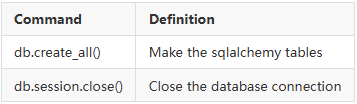

Use the class level fixtures to invoke **`db.create_all()`** before all tests and **`db.session.close()`** after all tests.

## Solution (`test_account.py`)

In [5]:
@classmethod
def setUpClass(cls):
    """ Connect and load data needed by tests """
    db.create_all()  # make our SQLAlchemy tables


@classmethod
def tearDownClass(cls):
    """Disconnect from database"""
    db.session.close() # close the database session

## Run the Tests

Run `nosetests` to make sure that your test case executes without errors.

# Step 2: Load Test Data

In this step, you are going to load some test data so that it can be used during testing. 

This should only need to be done once before all tests so you will do this in a class method.

## Your Task

There is test data in a file under the `tests/fixtures` folder called `account_data.json`.

Load the data from `tests/fixtures/account_data.json` into a global variable called `ACCOUNT_DATA` that has already been declared.

The Python code to load the data is:

```
with open('tests/fixtures/account_data.json') as json_data:
    ACCOUNT_DATA = json.load(json_data)
```

## Solution (`test_account.py`)

In [6]:
@classmethod
def setUpClass(cls):
    """ Connect and Load data needed by tests """
    db.create_all()  # make our SQLAlchemy tables
    global ACCOUNT_DATA
    with open('tests/fixtures/account_data.json') as json_data:
        ACCOUNT_DATA = json.load(json_data)

## Run the Tests

Run `nosetests` to make sure that your test case executes without errors.

# Step 3: Write a Test Case to Create an Account

Now you are ready to write your first test. You will create a single account using the `ACCOUNT_DATA` dictionary that has test data for five accounts.

## Your Task

The Account class has a `create()` method that can be used to add an account to the database. It also has an `all()` method that performs a query that returns all accounts.

Your test cases should create an account and then call the `Account.all()` method and assert that one account was returned.

## Solution (`test_account.py`)

In [ ]:
def test_create_an_account(self):
    """ Test create a single Account """
    data = ACCOUNT_DATA[0] # get the first account
    account = Account(**data)
    account.create()
    self.assertEqual(len(Account.all()), 1)

## Run the Tests

Run `nosetests` to make sure that your test case passes.

You should see:

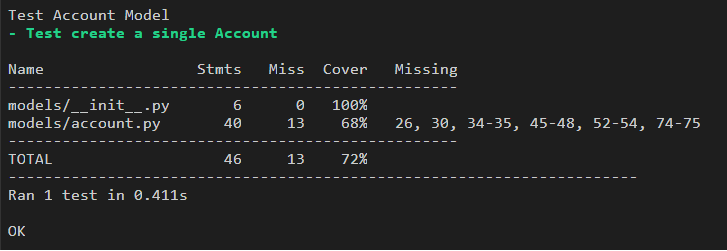

# Step 4: Write a Test Case to Create All Accounts

Now that you know that one account can be successfully created, let’s write a test case that creates all five of the accounts in the `ACCOUNT_DATA` dictionary.

## Your Task

Use a `for` loop to load all of the data from the `ACCOUNT_DATA` dictionary and then use the `Account.all()` method to retrieve them and assert that the number of accounts returned is equal to the number of accounts in the test data dictionary.

## Solution (`test_account.py`)

In [7]:
def test_create_all_accounts(self):
    """ Test creating multiple Accounts """
    for data in ACCOUNT_DATA:
        account = Account(**data)
        account.create()
    self.assertEqual(len(Account.all()), len(ACCOUNT_DATA))

## Run the Tests

Run `nosetests` to make sure that your test case passes.

**ERROR:** This time the tests did not pass! You should have received two errors about **AssertionError: 6 != 5** and **AssertionError: 7 != 1**:

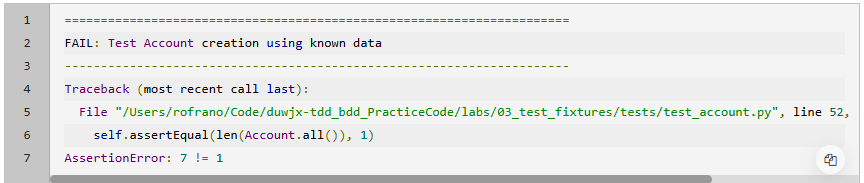

**Why were seven accounts returned when we only expect one?**

Let’s see how we can fix this in the next step.

# Step 5: Clear out the tables before each test

The reason that your test case failed is because data from a previous test has affected the outcome of the next test. To avoid this, you need to add more test fixtures that will run before and after each test.

## Your Task

One way of removing the data from a table is with the **`db.session.query(<Table>).delete()`** command where **`<Table>`** is the class name of the tables. This will delete all of the records in the table. You must also use **`db.session.commit()`** to commit this change. Add that to the fixture that runs before each test.

The correct syntax for your **`Account`** class is: `db.session.query(Account).delete()`

It’s also a good idea to use the `db.session.remove()` command after each test. 

Add that to the fixture that runs after each test.

## Solution (`test_account.py`)

In [8]:
def setUp(self):
    """Truncate the tables"""
    db.session.query(Account).delete()
    db.session.commit()


def tearDown(self):
    """Remove the session"""
    db.session.remove()

## Run the Tests

Run `nosetests` to make sure that your test case passes.

You should see the following report:

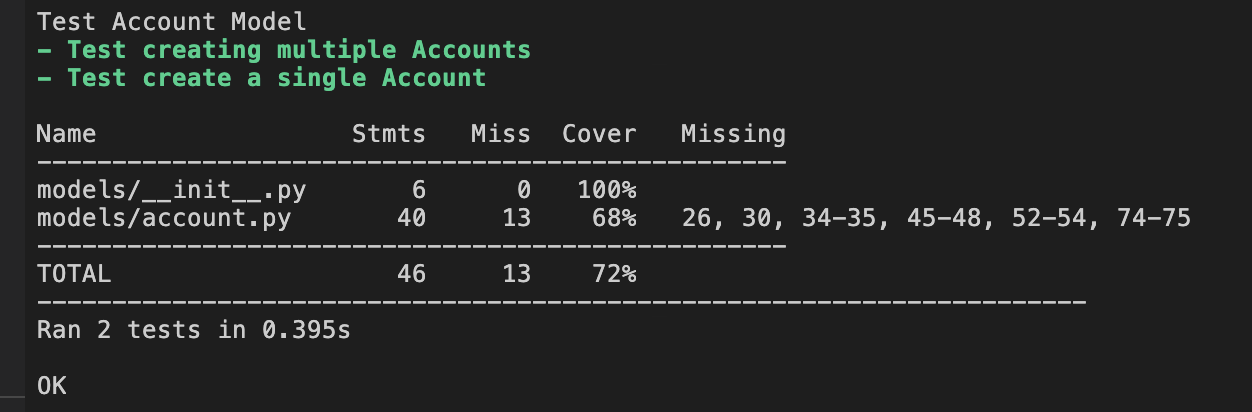

**Congratulations!** All of your test cases have passed this time.